# Lesson 19

In [2]:
import numpy as np
import pandas as pd
import altair as alt

In [3]:
!head ../data/gfmt_sleep.csv

﻿participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
8,f,39,65,80,72.5,91,90,93,83.5,93,90,9,13,2
16,m,42,90,90,90,75.5,55.5,70.5,50,75,50,4,11,7
18,f,31,90,95,92.5,89.5,90,86,81,89,88,10,9,3
22,f,35,100,75,87.5,89.5,*,71,80,88,80,13,8,20
27,f,74,60,65,62.5,68.5,49,61,49,65,49,13,9,12
28,f,61,80,20,50,71,63,31,72.5,64.5,70.5,15,14,2
30,m,32,90,75,82.5,67,56.5,66,65,66,64,16,9,3
33,m,62,45,90,67.5,54,37,65,81.5,62,61,14,9,9
34,f,33,80,100,90,70.5,76.5,64.5,*,68,76.5,14,12,10


In [4]:
df = pd.read_csv('../data/gfmt_sleep.csv', na_values = '*')

In [5]:
df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12


In [6]:
df.loc[4, 'percent correct']

62.5

In [7]:
df.loc[df['participant number'] == 22, :]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20


In [8]:
df.loc[(df['age'] < 21) & (df['gender'] == 'f'), :]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
27,3,f,16,70,80,75.0,70.0,57.0,54.0,53.0,57.0,54.5,23,1,3
29,5,f,18,90,100,95.0,76.5,83.0,80.0,NaN,80.0,83.0,21,7,5
66,58,f,16,85,85,85.0,55.0,30.0,50.0,40.0,52.5,35.0,29,2,11
79,72,f,18,80,75,77.5,67.5,51.5,66.0,57.0,67.0,53.0,29,4,6
88,85,f,18,85,85,85.0,93.0,92.0,91.0,89.0,91.5,91.0,25,4,21


In [9]:
inds = (df['age'] > 30) & (df['gender'] == 'f') & (df['percent correct'] > 85)

df.loc[inds, :]

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20
8,34,f,33,80,100,90.0,70.5,76.5,64.5,NaN,68.0,76.5,14,12,10
11,41,f,36,90,100,95.0,76.5,75.5,75.0,NaN,76.0,75.5,15,7,0
31,7,f,38,90,95,92.5,77.0,43.5,79.0,21.0,78.0,36.0,28,3,4
40,19,f,45,100,85,92.5,68.0,NaN,61.0,54.0,62.0,54.0,30,2,13
45,25,f,36,100,80,90.0,88.0,NaN,66.0,63.5,81.0,63.5,26,5,4
47,29,f,43,90,85,87.5,65.5,27.0,41.0,45.0,50.0,45.0,32,1,3
55,43,f,31,85,90,87.5,82.0,49.0,81.0,36.0,82.0,49.0,26,5,10
57,45,f,42,90,90,90.0,83.0,83.0,80.5,36.0,82.5,76.0,23,3,11


In [10]:
df['insomnia'] = df['sci'] <= 16

In [11]:
df.describe()

,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,84.000000,102.000000,93.000000,102.000000,99.000000,102.000000,102.000000,102.000000
mean,52.049020,37.921569,83.088235,77.205882,80.147059,74.990196,58.565476,71.137255,61.220430,74.642157,61.979798,22.245098,5.274510,7.294118
std,30.020909,14.029450,15.091210,17.569854,12.047881,14.165916,19.560653,14.987479,17.671283,13.619725,15.921670,7.547128,3.404007,4.426715
min,1.000000,16.000000,35.000000,20.000000,40.000000,29.500000,7.000000,19.000000,17.000000,24.000000,24.500000,0.000000,0.000000,0.000000
25%,26.250000,26.500000,75.000000,70.000000,72.500000,66.000000,46.375000,64.625000,50.000000,66.000000,51.000000,17.000000,3.000000,4.000000
50%,52.500000,36.500000,90.000000,80.000000,83.750000,75.000000,56.250000,71.250000,61.000000,75.750000,61.500000,23.500000,5.000000,7.000000
75%,77.750000,45.000000,95.000000,90.000000,87.500000,86.500000,73.500000,80.000000,74.000000,82.375000,73.000000,29.000000,7.000000,10.000000
max,103.000000,74.000000,100.000000,100.000000,100.000000,100.000000,92.000000,100.000000,100.000000,100.000000,100.000000,32.000000,15.000000,21.000000


In [12]:
df.loc[df['insomnia'] == True].describe()

,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,17.000000,25.000000,22.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,53.400000,40.320000,82.000000,70.20000,76.100000,78.340000,67.735294,72.780000,70.181818,77.080000,70.000000,11.680000,9.440000,7.640000
std,29.219001,12.915495,18.314384,23.33988,13.347909,12.490596,15.740193,16.551737,15.193628,12.591896,14.108951,4.552655,2.887906,5.314132
min,8.000000,24.000000,40.000000,20.00000,45.000000,54.000000,37.000000,31.000000,43.500000,54.500000,49.000000,0.000000,4.000000,0.000000
25%,30.000000,31.000000,70.000000,55.00000,70.000000,69.500000,56.000000,65.000000,60.000000,68.000000,60.000000,10.000000,7.000000,3.000000
50%,46.000000,39.000000,90.000000,75.00000,75.000000,76.500000,72.000000,71.000000,68.500000,77.000000,65.000000,14.000000,9.000000,7.000000
75%,78.000000,44.000000,100.000000,90.00000,87.500000,89.500000,77.000000,85.000000,80.750000,87.500000,76.500000,14.000000,12.000000,11.000000
max,101.000000,74.000000,100.000000,100.00000,97.500000,100.000000,90.000000,100.000000,100.000000,100.000000,100.000000,16.000000,15.000000,20.000000


# Lesson 20
Tidy Data

In [13]:
df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True


In [14]:
grouped = df.groupby('insomnia')

In [15]:
grouped['percent correct'].rank()

0      11.0
1      21.5
2      23.0
3      19.5
4       3.5
5       2.0
6      17.0
7       6.0
8      21.5
9      12.5
10      3.5
11     24.0
12     15.0
13     15.0
14      5.0
15      8.5
16      8.5
17     15.0
18     18.0
19     12.5
20      8.5
21     25.0
22     19.5
23      1.0
24      8.5
25     15.0
26     41.0
27     19.0
28      9.5
29     72.0
       ... 
72     52.5
73     74.0
74     67.5
75     76.0
76      4.5
77     72.0
78     25.0
79     25.0
80     34.0
81      1.0
82     52.5
83     41.0
84     52.5
85     25.0
86      6.5
87     15.0
88     41.0
89     67.5
90     41.0
91     15.0
92     61.0
93     61.0
94      2.0
95     52.5
96      4.5
97     25.0
98     52.5
99     19.0
100    11.5
101     6.5
Name: percent correct, Length: 102, dtype: float64

In [16]:
def coeff_of_var(data):
    """Computes coefficient of variation for some array of data"""
    return np.std(data) / np.mean(data)

In [17]:
grouped.agg(coeff_of_var).reset_index()

,insomnia,participant number,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess
0,False,0.586191,0.384262,0.166784,0.184061,0.138785,0.195978,0.350286,0.204312,0.298216,0.187304,0.262509,0.175245,0.577869,0.571566
1,True,0.536117,0.313853,0.218834,0.325760,0.171856,0.156219,0.225440,0.222827,0.211512,0.160061,0.197484,0.381907,0.299741,0.681514


In [18]:
df['rank grouped by insomnia'] = (grouped['percent correct']
                                  .rank(method='first'))

In [19]:
df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,rank grouped by insomnia
0,8,f,39,65,80,72.5,91.0,90.0,93.0,83.5,93.0,90.0,9,13,2,True,11.0
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50.0,75.0,50.0,4,11,7,True,21.0
2,18,f,31,90,95,92.5,89.5,90.0,86.0,81.0,89.0,88.0,10,9,3,True,23.0
3,22,f,35,100,75,87.5,89.5,NaN,71.0,80.0,88.0,80.0,13,8,20,True,19.0
4,27,f,74,60,65,62.5,68.5,49.0,61.0,49.0,65.0,49.0,13,9,12,True,3.0


In [20]:
df_sorted = df.sort_values(by=['insomnia', 'percent correct'])

df_sorted[['insomnia', 'percent correct', 'rank grouped by insomnia']]

,insomnia,percent correct,rank grouped by insomnia
81,False,40.0,1.0
94,False,55.0,2.0
39,False,57.5,3.0
76,False,60.0,4.0
96,False,60.0,5.0
86,False,62.5,6.0
101,False,62.5,7.0
41,False,65.0,8.0
28,False,67.5,9.0
50,False,67.5,10.0


# Lesson 22

In [21]:
df = pd.read_csv('../data/gfmt_sleep.csv', na_values = '*')
df['insomnia'] = df['sci'] <= 16

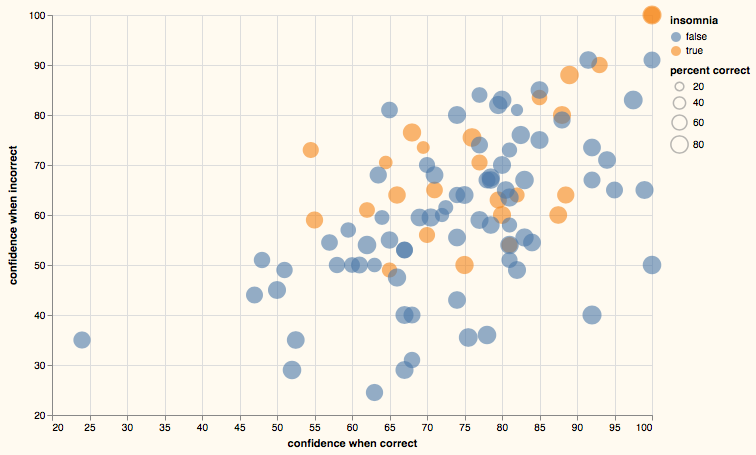

In [22]:
alt.Chart(
        df,
        height=400,
        width=600,
        background='floralwhite'
    ).mark_point(
            filled=True,
            opacity=0.6
    ).encode(x=alt.X('confidence when correct',
                     type='quantitative',
                     scale=alt.Scale(zero=False)),
             y=alt.X('confidence when incorrect',
                     type='quantitative',
                     scale=alt.Scale(zero=False)),
             color='insomnia:N',
             size='percent correct:Q',
            tooltip=['gender', 'insomnia', 'percent correct'])

In [23]:
df = pd.read_csv('../data/frog_tongue_adhesion.csv', comment='#')
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [27]:
chart = alt.Chart(
            df,
            height=400,
            width=600
            ).mark_point(
            size=80
            ).encode(
                x=alt.X('impact force (mN)',
                        type='quantitative',
                        scale=alt.Scale(type='linear')),
                y=alt.X('adhesive force (mN)',
                        type='quantitative'),
                color=alt.Color('ID:N',
                                title='Frog ID'))
    

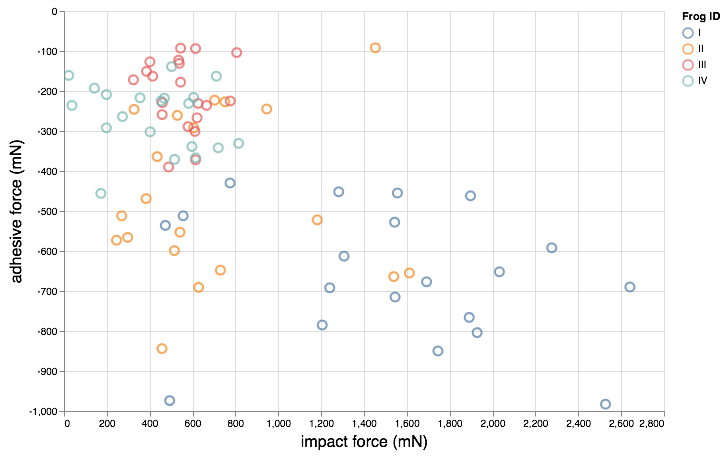

In [28]:
chart.configure_view(
        height=200, width=400
    ).configure_axis(
        titleFontSize=16,
        titleFontWeight='normal'
    ).interactive()

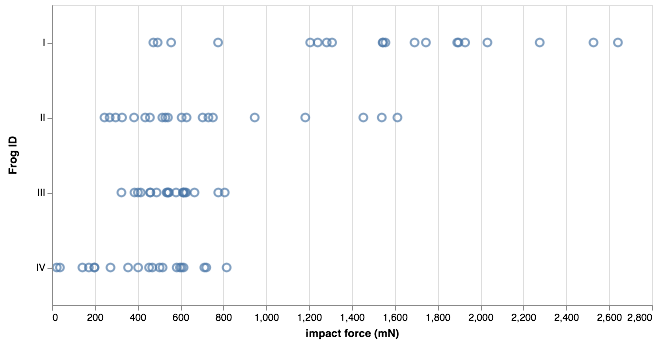

In [29]:
alt.Chart(
    df,
    height=300,
    width=600
    ).mark_point(
    size=60
    ).encode(
        x='impact force (mN):Q',
        y=alt.Y('ID:N', title='Frog ID'))

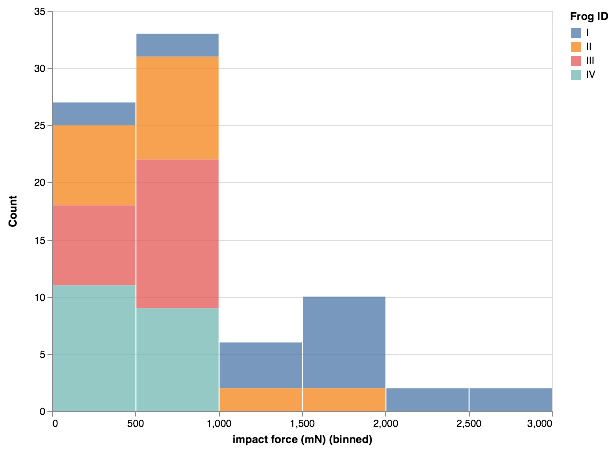

In [30]:
alt.Chart(
    df,
    height=400,
    width=500
    ).mark_bar(
    opacity=0.75
    ).encode(
        x=alt.X('impact force (mN)',
                type='quantitative',
                bin=True),
        y=alt.Y('count()', title='Count'),
        color=alt.Color('ID', title='Frog ID'))

In [31]:
import bootcamp_utils

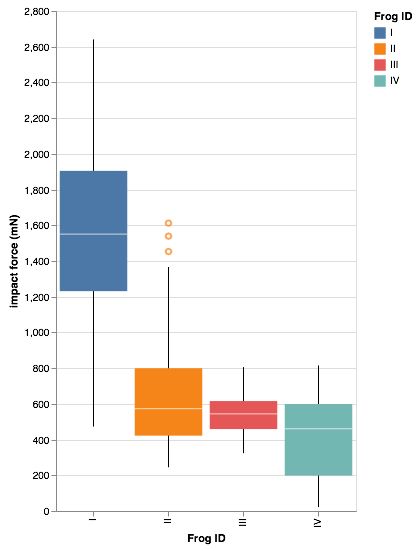

In [32]:
bootcamp_utils.altair_box(df,
                             height=500,
                             width=300,
                             encode_x=alt.X('ID:N', title='Frog ID'),
                             encode_y='impact force (mN):Q',
                             encode_color=alt.Color('ID:N', title='Frog ID'))

In [33]:
df_summary = (df.groupby('ID')['impact force (mN)']
                 .agg(['mean', 'sem'])
                 .reset_index())

In [34]:
df_summary['error low'] = df_summary['mean'] - 1.96*df_summary['sem']
df_summary['error high'] = df_summary['mean'] + 1.96*df_summary['sem']

df_summary

,ID,mean,sem,error low,error high
0,I,1530.20,140.918782,1253.999187,1806.400813
1,II,707.35,94.937466,521.272566,893.427434
2,III,550.10,27.788477,495.634584,604.565416
3,IV,419.10,52.517260,316.166170,522.033830


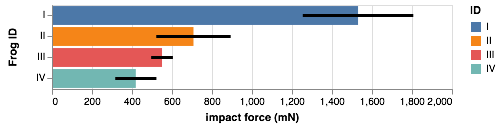

In [35]:
bars = alt.Chart(df_summary
    ).mark_bar(
    ).encode(
        x=alt.X('mean:Q', title='impact force (mN)'),
        y=alt.Y('ID:N', title='Frog ID'),
        color='ID:N')

error_bars = alt.Chart(df_summary
    ).mark_rule(
    size=3
    ).encode(
        x='error low:Q',
        x2='error high:Q',
        y=alt.Y('ID:N', title='Frog ID')
    )

bars + error_bars